# Covid-19 Data Analysis

Import Libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import json
import requests

Get data from api

In [19]:
#data1 = pd.read_csv("http://api.covid19india.org/csv/latest/raw_data1.csv")
data1 = pd.read_csv("raw_data1.csv")
data1

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,...,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,Num Cases
0,1.0,KL-TS-P1,30/01/2020,NaN,20,F,Thrissur,Thrissur,Kerala,KL,...,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1
1,2.0,KL-AL-P1,02/02/2020,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,...,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1
2,3.0,KL-KS-P1,03/02/2020,NaN,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,...,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,1
3,4.0,DL-P1,02/03/2020,NaN,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,...,"Travelled from Austria, Italy",NaN,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria,1
4,5.0,TS-P1,02/03/2020,NaN,24,M,Hyderabad,Hyderabad,Telangana,TG,...,"Travelled from Dubai to Bangalore on 20th Feb,...",NaN,India,Imported,02/03/2020,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17359,NaN,NaN,16/04/2020,NaN,NaN,NaN,NaN,NaN,Maharashtra,MH,...,Correction for district count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2
17360,NaN,NaN,18/04/2020,NaN,NaN,NaN,NaN,Nagpur,Maharashtra,MH,...,Correction for district count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
17361,NaN,NaN,18/04/2020,NaN,NaN,NaN,NaN,NaN,Maharashtra,MH,...,Correction for district count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
17362,NaN,NaN,19/04/2020,NaN,NaN,NaN,NaN,Nagpur,Maharashtra,MH,...,Correction for district count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


Get the data from all the pages

In [20]:
data2 = pd.read_csv("raw_data2.csv")
data3 = pd.read_csv("raw_data3.csv")
data4 = pd.read_csv("raw_data4.csv")
data5 = pd.read_csv("raw_data5.csv")
data6 = pd.read_csv("raw_data6.csv")
data7 = pd.read_csv("raw_data7.csv")
data8 = pd.read_csv("raw_data8.csv")
data9 = pd.read_csv("raw_data9.csv")
data10 = pd.read_csv("raw_data10.csv")
data11 = pd.read_csv("raw_data11.csv")
data12 = pd.read_csv("raw_data12.csv")


Inspecting the data

In [21]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17364 entries, 0 to 17363
Data columns (total 21 columns):
Patient Number                               17306 non-null float64
State Patient Number                         2457 non-null object
Date Announced                               17364 non-null object
Estimated Onset Date                         0 non-null float64
Age Bracket                                  1670 non-null object
Gender                                       3746 non-null object
Detected City                                2166 non-null object
Detected District                            14978 non-null object
Detected State                               17363 non-null object
State code                                   17363 non-null object
Current Status                               17364 non-null object
Notes                                        16046 non-null object
Contracted from which Patient (Suspected)    1537 non-null object
Nationality                

check the coulumns 

In [26]:
data1.columns

Index(['Patient Number', 'State Patient Number', 'Date Announced',
       'Estimated Onset Date', 'Age Bracket', 'Gender', 'Detected City',
       'Detected District', 'Detected State', 'State code', 'Current Status',
       'Notes', 'Contracted from which Patient (Suspected)', 'Nationality',
       'Type of transmission', 'Status Change Date', 'Source_1', 'Source_2',
       'Source_3', 'Backup Notes', 'Num Cases'],
      dtype='object')

Match all the columns

In [27]:
data1 = data1.rename(columns={"Num cases":"Num Cases"})
data2 = data2.rename(columns={"Num cases":"Num Cases"})

Retain Necessary colums

In [28]:
df1 = data1.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State','Current Status']]
df2 = data2.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State','Current Status']]
df3 = data3.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State','Current Status']]
df4 = data4.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State','Current Status']]
df5 = data5.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State','Current Status']]
df6 = data6.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State','Current Status']]
df7 = data7.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State','Current Status']]
df8 = data8.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State','Current Status']]
df9 = data9.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State','Current Status']]
df10 = data10.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State','Current Status']]
df11 = data11.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State','Current Status']]
df12 = data12.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State','Current Status']]


Merging Data 

In [29]:
data  = df1.append([df2,df3 , df4 , df5 , df6 , df7 , df8,df9,df10,df11,df12] )

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238071 entries, 0 to 13171
Data columns (total 8 columns):
Num Cases            238061 non-null float64
Date Announced       238070 non-null object
Age Bracket          107121 non-null object
Gender               109899 non-null object
Detected City        11752 non-null object
Detected District    229037 non-null object
Detected State       238055 non-null object
Current Status       238062 non-null object
dtypes: float64(1), object(7)
memory usage: 16.3+ MB


In [31]:
data['Date Announced']

0        30/01/2020
1        02/02/2020
2        03/02/2020
3        02/03/2020
4        02/03/2020
            ...    
13167    31/07/2020
13168    31/07/2020
13169    31/07/2020
13170    31/07/2020
13171    31/07/2020
Name: Date Announced, Length: 238071, dtype: object

Making seperate coloumns for Day , Month and Year

In [32]:
Date = data['Date Announced'].str.split('/',expand=True)
Date.columns = ['Day','Month','Year']

Concat these columns in orignal data

In [33]:
data = pd.concat([data, Date],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238071 entries, 0 to 13171
Data columns (total 11 columns):
Num Cases            238061 non-null float64
Date Announced       238070 non-null object
Age Bracket          107121 non-null object
Gender               109899 non-null object
Detected City        11752 non-null object
Detected District    229037 non-null object
Detected State       238055 non-null object
Current Status       238062 non-null object
Day                  238070 non-null object
Month                238070 non-null object
Year                 238070 non-null object
dtypes: float64(1), object(10)
memory usage: 21.8+ MB


Save data in another file

In [34]:
data.to_csv("Covid19India.csv")


Read the new Data

In [35]:
Data = pd.read_csv("Covid19India.csv")

Get the coulumns

In [36]:
Data.columns

Index(['Unnamed: 0', 'Num Cases', 'Date Announced', 'Age Bracket', 'Gender',
       'Detected City', 'Detected District', 'Detected State',
       'Current Status', 'Day', 'Month', 'Year'],
      dtype='object')

Removing Index(1st columns) 

In [37]:
Data = Data.iloc[:,1:]

Inspecting Data

In [29]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145859 entries, 0 to 145858
Data columns (total 11 columns):
Num Cases            145856 non-null float64
Date Announced       145859 non-null object
Age Bracket          60013 non-null object
Gender               62808 non-null object
Detected City        10949 non-null object
Detected District    137460 non-null object
Detected State       145850 non-null object
Current Status       145857 non-null object
Day                  145859 non-null int64
Month                145859 non-null int64
Year                 145859 non-null int64
dtypes: float64(1), int64(3), object(7)
memory usage: 12.2+ MB


Inspect Nan values of each columns

In [38]:
Data.isnull().sum().sort_values(ascending = False)

Detected City        226319
Age Bracket          130950
Gender               128172
Detected District      9034
Detected State           16
Num Cases                10
Current Status            9
Year                      1
Month                     1
Day                       1
Date Announced            1
dtype: int64

Get the missing values in percentage

In [39]:
Data.isnull().sum().sort_values(ascending=False)/len(Data) * 100

Detected City        95.063657
Age Bracket          55.004599
Gender               53.837721
Detected District     3.794666
Detected State        0.006721
Num Cases             0.004200
Current Status        0.003780
Year                  0.000420
Month                 0.000420
Day                   0.000420
Date Announced        0.000420
dtype: float64

Total covid Cases month Vise

In [40]:
Data.groupby('Month')['Num Cases'].sum()


Month
1.0          1.0
2.0          2.0
3.0       1635.0
4.0      36078.0
5.0     242853.0
6.0     663178.0
7.0    1878572.0
Name: Num Cases, dtype: float64

In [41]:
Data[Data['Current Status']=='Hospitalized'].groupby('Month')['Num Cases'].sum()

Month
3.0       1431.0
4.0      33208.0
5.0     155781.0
6.0     395144.0
7.0    1111262.0
Name: Num Cases, dtype: float64

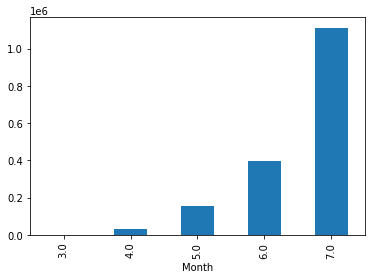

In [42]:
m = Data[Data['Current Status']=='Hospitalized'].groupby('Month')['Num Cases'].sum()
m.plot.bar()
plt.show()

Total Male / Female infected with CronaVirus

In [43]:
Data.groupby('Gender')['Num Cases'].sum()

Gender
F             38608.0
Femal e           1.0
M             72657.0
M                 1.0
M,                1.0
Non-Binary       17.0
Name: Num Cases, dtype: float64

Which age group is infected Most?


In [44]:
Data.groupby('Age Bracket')['Num Cases'].sum().sort_values(ascending=False)

Age Bracket
30.0        1910.0
30          1712.0
40.0        1694.0
35.0        1620.0
35          1594.0
             ...  
5 Months       1.0
4.5            1.0
29.6           1.0
2.4            1.0
99.0           1.0
Name: Num Cases, Length: 236, dtype: float64

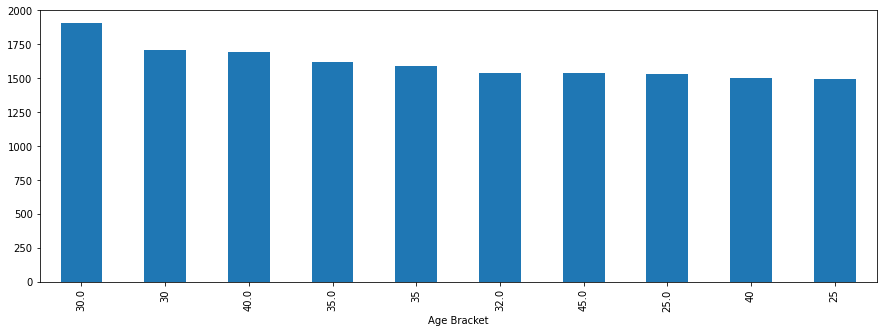

In [45]:
m = Data.groupby('Age Bracket')['Num Cases'].sum().sort_values(ascending=False).head(10)
m.plot.bar(figsize=(15,5))
plt.show()

Check state wise Total case in india

In [46]:
Data[Data['Current Status']=='Hospitalized'].groupby('Detected State')['Num Cases'].sum()

Detected State
Andaman and Nicobar Islands                    537.0
Andhra Pradesh                              140931.0
Arunachal Pradesh                             1591.0
Assam                                        40270.0
Bihar                                        50986.0
Chandigarh                                    1051.0
Chhattisgarh                                  9184.0
Dadra and Nagar Haveli and Daman and Diu      1149.0
Delhi                                       135594.0
Goa                                           5913.0
Gujarat                                      61433.0
Haryana                                      34953.0
Himachal Pradesh                              2562.0
Jammu and Kashmir                            20358.0
Jharkhand                                    11314.0
Karnataka                                   124042.0
Kerala                                       23553.0
Ladakh                                        1404.0
Madhya Pradesh                 

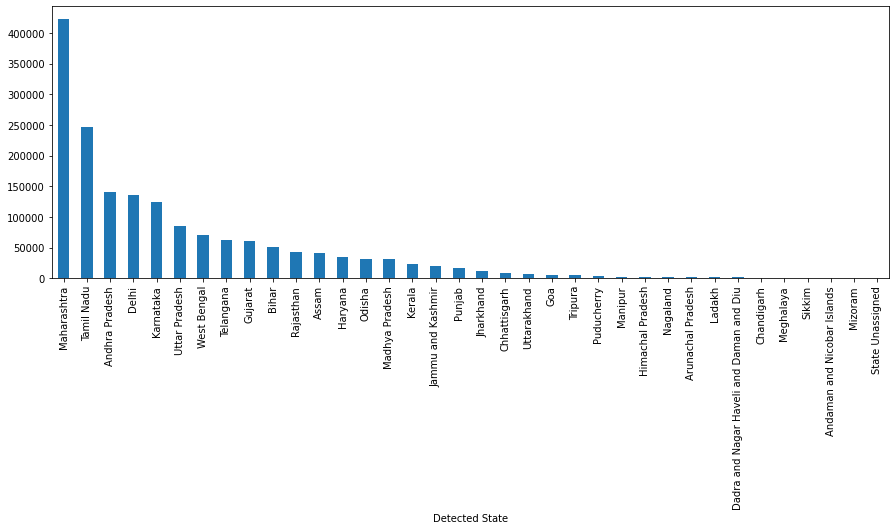

In [48]:
m = Data[Data['Current Status']=='Hospitalized'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False)
m.plot.bar(figsize=(15,5))
plt.show()

How many cases EveryDay

In [49]:
Data[Data['Current Status']=='Hospitalized'].groupby(['Month','Day'])['Num Cases'].sum()



Month  Day 
3.0    4.0         5.0
       5.0         1.0
       7.0         2.0
       9.0         4.0
       10.0        4.0
                ...   
7.0    27.0    46484.0
       28.0    49631.0
       29.0    52479.0
       30.0    54968.0
       31.0    57486.0
Name: Num Cases, Length: 148, dtype: float64

/home/aman/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/aman/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/aman/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/aman/.local/lib/python3.6/site-packages/pandas/plo

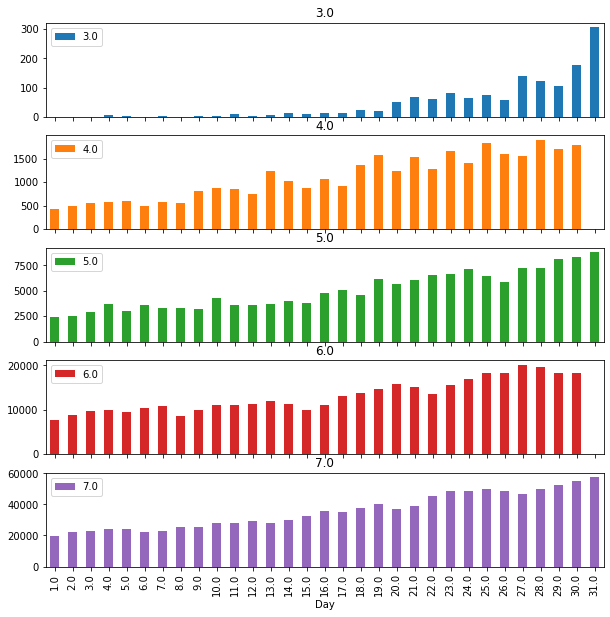

In [50]:
m = Data[Data['Current Status']=='Hospitalized'].groupby(['Month','Day'])['Num Cases'].sum()
m.unstack(level=0).plot(kind='bar',subplots=True,figsize=(10,10))
plt.show()